In [109]:
import pathlib # for processing a path e.g., c:\documents\files\test_ds.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.
import os 

In [110]:
!pip install tensorflow_docs

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [111]:
# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# Print tensorfow (TF) version. Make sure you have at least tensorflow 2.1.0
print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.15.0


In [112]:
tf.random.set_seed(13) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)


In [113]:
all_ds = pd.read_csv("/kaggle/input/cars-final-version/Final_Shuffled_Clean_Data.csv")
all_ds.head()

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année,Prix
0,47,160,170000,2,0,19,2,2008,78000
1,47,143,119000,2,0,8,2,2015,115000
2,47,241,83000,7,0,9,9,2021,193000
3,20,414,91000,2,1,6,2,2019,44000
4,47,151,138000,2,0,10,2,2016,145000


In [114]:
print(f'Number of rows/examples and columns in the dataset: {all_ds.shape}')


Number of rows/examples and columns in the dataset: (8134, 9)


In [115]:
# Summary of information on the dataset.
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8134 entries, 0 to 8133
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Marque             8134 non-null   int64
 1   Modèle             8134 non-null   int64
 2   Kilométrage        8134 non-null   int64
 3   Carburant          8134 non-null   int64
 4   Boite Vitesse      8134 non-null   int64
 5   Puissance Fiscale  8134 non-null   int64
 6   Carrosserie        8134 non-null   int64
 7   Année              8134 non-null   int64
 8   Prix               8134 non-null   int64
dtypes: int64(9)
memory usage: 572.0 KB


In [116]:
# Split the data into 60% train and 40% test .
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.4)
# Split the test_dataset dataframe to 50% test and 50% validation. 
#[this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print(f" Train dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

 Train dataset       : (4880, 9)
 Test dataset       : (1627, 9)
 Validation dataset : (1627, 9)


In [117]:
# # Plot the relationship between each two variables to spot anything incorrect.
# train_stats = train_dataset.describe()
# train_stats.pop("Prix")
# sns.pairplot(train_stats[train_stats.columns], diag_kind="kde")

In [118]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("Prix")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Marque,4880.0,38.921311,20.104216,0.0,23.0,47.0,54.0,70.0
Modèle,4880.0,261.023566,148.019136,0.0,143.0,257.0,390.0,542.0
Kilométrage,4880.0,146813.015164,199367.923641,1000.0,73000.0,122000.0,187000.0,9999999.0
Carburant,4880.0,1.569672,1.017606,0.0,2.0,2.0,2.0,7.0
Boite Vitesse,4880.0,0.562090,0.496181,0.0,0.0,1.0,1.0,1.0
Puissance Fiscale,4880.0,7.949385,5.236887,4.0,5.0,7.0,9.0,85.0
Carrosserie,4880.0,4.246107,3.088482,0.0,2.0,4.0,6.0,10.0
Année,4880.0,2015.183197,6.289690,1953.0,2013.0,2017.0,2019.0,2024.0


In [119]:
train_labels = train_dataset.pop('Prix')
test_labels = test_dataset.pop('Prix')
valid_labels = valid_dataset.pop('Prix')

train_labels=train_labels/1000
test_labels=test_labels/1000
valid_labels=valid_labels/1000

In [120]:
train_labels.describe()

count    4880.000000
mean       73.273693
std        62.229760
min         4.700000
25%        35.900000
50%        55.000000
75%        88.597000
max       999.999000
Name: Prix, dtype: float64

# Data Normalization/Scaling

# Subtract the mean of the training data and divide by the standard deviation of the training data.

In [121]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [122]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape} ')
print(f'Test Labels  : {test_labels.shape} ')
print(f'Test Labels  : {valid_labels.shape} ')

Train/Test/Validate splits: 
Train    : (4880, 8) 
Test     : (1627, 8) 
Validate : (1627, 8) 
Train/Test/Validate labels: 
Train Labels : (4880,) 
Test Labels  : (1627,) 
Test Labels  : (1627,) 


In [123]:
# show a sample of the data after normalized
normed_train_data.head(10)

,Marque,Modèle,Kilométrage,Carburant,Boite Vitesse,Puissance Fiscale,Carrosserie,Année
5291,-0.791939,-0.250127,0.111287,0.422883,0.882561,-0.563194,0.244098,0.129864
1284,-1.687274,1.310482,-0.535758,0.422883,-1.132834,0.009665,0.244098,0.924816
4377,-0.841680,0.688941,0.367095,0.422883,0.882561,-0.563194,-0.079685,-1.778020
1188,-0.841680,1.506403,-0.515695,0.422883,0.882561,-0.372241,-0.727253,0.447845
1304,0.401841,-0.797353,-0.184649,0.422883,-1.132834,0.009665,-0.727253,-0.029127
6695,0.750026,0.513288,-0.134490,0.422883,0.882561,-0.181288,0.244098,0.288854
6334,1.297175,-0.020427,-0.528234,0.422883,0.882561,-0.563194,-0.727253,0.924816
601,-1.836496,0.817303,-0.239823,0.422883,-1.132834,0.009665,1.539233,0.447845
6389,0.103396,0.945664,-0.400330,-1.542515,-1.132834,0.200618,-1.374820,0.765825
7122,0.003914,0.749744,0.061128,0.422883,-1.132834,-0.563194,0.244098,-0.188117


In [124]:
# sns.pairplot(normed_train_data[["Marque", "Modèle", "Kilométrage", "Carburant","Boite Vitesse","Puissance Fiscale","Carrosserie","Année"]], diag_kind="kde")

# Build a Neural Network Model


In [125]:
# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 10 Neurons
    model.add(Dense(100, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(100,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)
        
    model.add(Dense(1000,Activation('relu')))    
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model


model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()

Here is a summary of this model: 


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1000)           │       101,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │         1,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,001 (441.41 KB)

 Trainable params: 113,001 (441.41 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
# keras.utils.plot_model(model, "my_car_predicting_model.png", show_shapes=True)

In [127]:
# We decalred a function for creating a model.
def build_model2_three_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(100, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(100,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 32)
    
    
    model.add(Dense(100, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(100, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 128)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_73 (Dense)                │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,301 (122.27 KB)

 Trainable params: 31,301 (122.27 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
# We decalred a function for creating a model.
def build_model3_five_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(100, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(100,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(100, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(100, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(100, Activation('relu')))                         # Hidden layer 4 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(100, Activation('relu')))                         # Hidden layer 5 => only output dimension should be designated (output dimension = # of Neurons = 64)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',                                        #loss=tf.keras.losses.Huber()
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model3 = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model3.summary()

Here is a summary of this model: 


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,501 (201.18 KB)

 Trainable params: 51,501 (201.18 KB)

 Non-trainable params: 0 (0.00 B)

# creating a custom modelcheckpoint callback that monitors val_loss and saves the best model during training for later

In [129]:
checkpoint_path = "price_prediction.weights.keras"

# Create a callback that saves the model's weights
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_loss', 
                                                 save_best_only=True, 
    
                                                 verbose=0,
                                                  )


# Training the model we built above.


In [130]:
%%time
EPOCHS = 500
batch_size = 26

model = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=0,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), 
                 ckpt_callback
                  ],
        
    )

Here is a summary of this model: 


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,501 (201.18 KB)

 Trainable params: 51,501 (201.18 KB)

 Non-trainable params: 0 (0.00 B)


Epoch: 0, loss:3348.7986,  mae:35.2994,  mape:56.2982,  mse:3348.7986,  val_loss:4945.8047,  val_mae:46.4838,  val_mape:82.6906,  val_mse:4945.8042,  
..

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


..................................................................................................
Epoch: 100, loss:860.1996,  mae:16.3494,  mape:32.2381,  mse:860.1996,  val_loss:1216.5321,  val_mae:16.7390,  val_mape:30.3483,  val_mse:1216.5321,  
....................................................................................................
Epoch: 200, loss:960.3344,  mae:16.7824,  mape:34.4196,  mse:960.3344,  val_loss:1407.3496,  val_mae:17.6400,  val_mape:30.8469,  val_mse:1407.3496,  
....................................................................................................
Epoch: 300, loss:668.8624,  mae:15.7980,  mape:33.8569,  mse:668.8624,  val_loss:1176.9249,  val_mae:17.1200,  val_mape:31.7928,  val_mse:1176.9248,  
....................................................................................................
Epoch: 400, loss:450.5702,  mae:13.0967,  mape:28.7200,  mse:450.5702,  val_loss:1047.8146,  val_mae:14.4549,  val_mape:27.9062,  val_mse:1047.81

In [131]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mape,mse,val_loss,val_mae,val_mape,val_mse,epoch
495,397.297302,14.516835,39.653248,397.297302,1205.942383,17.221924,35.209503,1205.942383,495
496,514.783142,14.967511,35.301430,514.783142,1183.088379,17.121338,34.425072,1183.088379,496
497,362.731995,13.719902,38.147842,362.731995,1190.213867,17.211130,34.416981,1190.213867,497
498,544.881653,15.197973,35.717476,544.881653,1316.995239,19.593328,38.823730,1316.995239,498
499,645.314514,17.052097,40.765888,645.314514,1300.734985,19.342081,38.436348,1300.734985,499


# Plotting the learning curves 

In [132]:
from matplotlib import pyplot

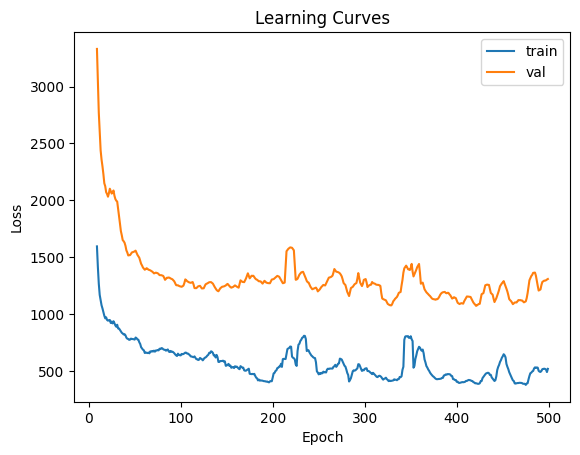

In [133]:

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define window size for smoothing
window_size = 10  # You can adjust this window size for more or less smoothing

# Compute the moving average for train and validation loss
smoothed_train_loss = moving_average(history.history['loss'], window_size)
smoothed_val_loss = moving_average(history.history['val_loss'], window_size)

# Adjust the epoch range to match the smoothed data
smoothed_epochs = range(window_size - 1, len(history.history['loss']))

# Plot the smoothed learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(smoothed_epochs, smoothed_train_loss, label='train')
plt.plot(smoothed_epochs, smoothed_val_loss, label='val')
plt.legend()
plt.show()


In [134]:
# # plot learning curves
# pyplot.title('Learning Curves')
# pyplot.xlabel('Epoch')
# pyplot.ylabel('Cross Entropy')
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='val')
# pyplot.legend()
# pyplot.show()

# See some of the model results


In [135]:
# normed_train_data.pop('medv')
# Test the model after training.
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
predicted values: 


array([[ 40.869072],
       [186.3401  ],
       [ 40.869072],
       [ 40.869072],
       [120.935196],
       [ 64.114265],
       [ 80.858475],
       [115.073006],
       [219.95882 ],
       [ 40.869072]], dtype=float32)

In [136]:
print('The ground truth: ')
train_labels[:10]

The ground truth: 


5291     37.0
1284    133.0
4377     14.8
1188     49.0
1304     94.0
6695     52.5
6334     86.5
601      88.0
6389    219.0
7122     33.0
Name: Prix, dtype: float64

# See how the training went by plotting the loss/mse across epochs


Text(0, 0.5, 'MAE [Price in "1000"DT]')

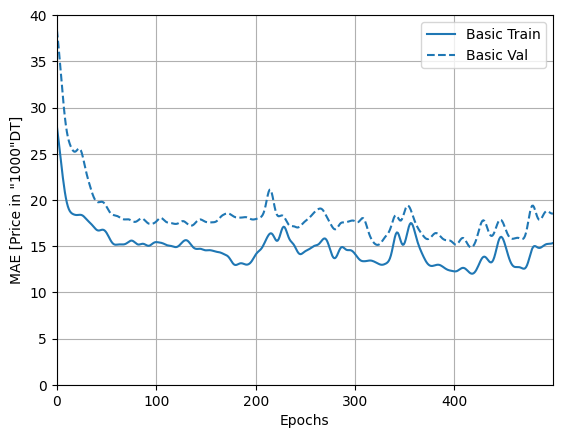

In [137]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=4)

plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 40])
plt.ylabel('MAE [Price in "1000"DT]')

Text(0, 0.5, 'MSE [Price^2]')

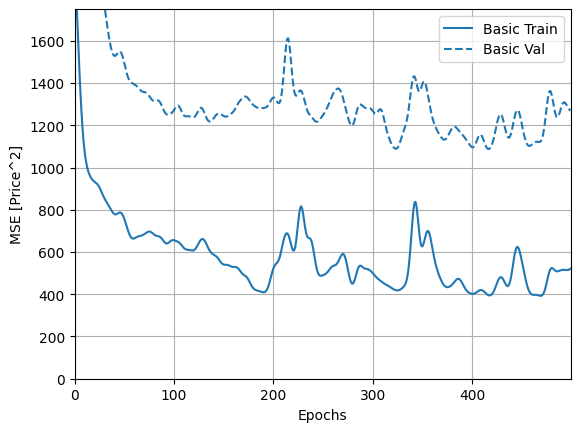

In [138]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 1750])
plt.ylabel('MSE [Price^2]')

In [139]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape  = model.evaluate(normed_train_data, train_labels, verbose=2)

print("Train set Mean Abs Error    : {:5.2f} medv".format(mae))
print("Train set Mean Squared Error: {:5.2f} medv".format(mse))
print("Train set Mean absolute percentage Error: {:5.2f} medv".format(mape))

Error Rate on Train Split: 
153/153 - 0s - 2ms/step - loss: 731.0837 - mae: 17.7629 - mape: 39.4664 - mse: 731.0837
Train set Mean Abs Error    : 17.76 medv
Train set Mean Squared Error: 731.08 medv
Train set Mean absolute percentage Error: 39.47 medv


In [140]:
print('Error Rate on Evaluation Split: ')
loss, mae, mse, mape = model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Validation set Mean Abs Error    : {:5.2f} medv".format(mae))
print("Validation set Mean Squared Error: {:5.2f} medv".format(mse))
print("Validation set Mean absolute percentage Error: {:5.2f} medv".format(mape))

Error Rate on Evaluation Split: 
51/51 - 0s - 2ms/step - loss: 1300.7347 - mae: 19.3421 - mape: 38.4364 - mse: 1300.7347
Validation set Mean Abs Error    : 19.34 medv
Validation set Mean Squared Error: 1300.73 medv
Validation set Mean absolute percentage Error: 38.44 medv


In [141]:
print('Error Rate on Test Split: ')
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error    : {:5.2f} medv".format(mae))
print("Testing set Mean Squared Error: {:5.2f} medv".format(mse))
print("Validation set Mean absolute percentage Error: {:5.2f} medv".format(mape))

Error Rate on Test Split: 
51/51 - 0s - 2ms/step - loss: 1236.1799 - mae: 20.4902 - mape: 40.6668 - mse: 1236.1799
Testing set Mean Abs Error    : 20.49 medv
Testing set Mean Squared Error: 1236.18 medv
Validation set Mean absolute percentage Error: 40.67 medv


153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


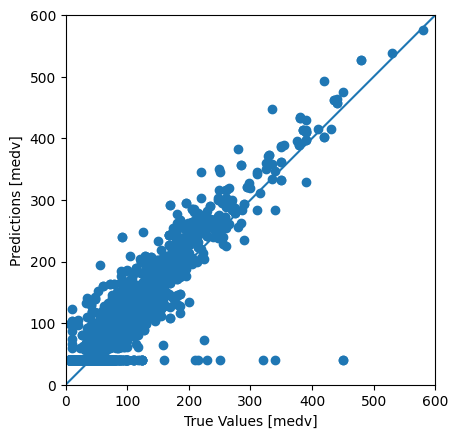

In [142]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0, 600]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


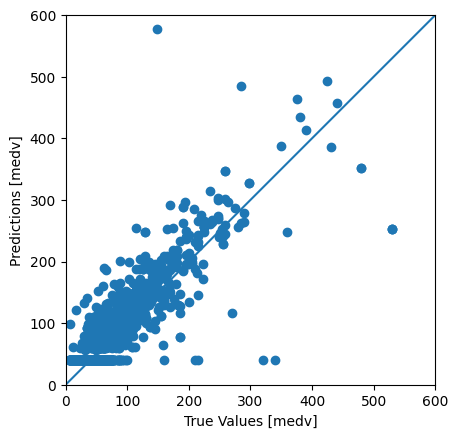

In [143]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0,600]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

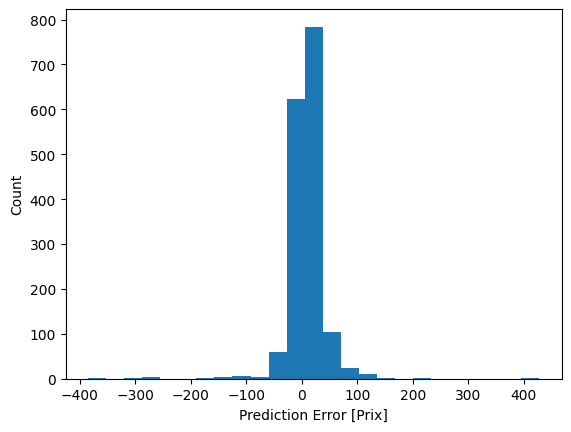

In [144]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Prix]")
_ = plt.ylabel("Count")